In [110]:
from scipy.fft import rfft,irfft, rfftfreq
import numpy as np
import wave
import pandas as pd
import sys
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
from IPython.display import Audio
import scipy.io.wavfile
import scipy.signal
from scipy.io.wavfile import write
from scipy.io import wavfile


In [111]:
sampling_rate,signal=wavfile.read("HARPINIC.wav")
t=np.array(range(0,len(signal)))/sampling_rate
len(signal)


55808

In [112]:
ipd.Audio("HARPINIC.wav")

In [113]:
y_sig= np.fft.rfft(signal)


In [114]:
freq= rfftfreq(len(signal),1/sampling_rate)


C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


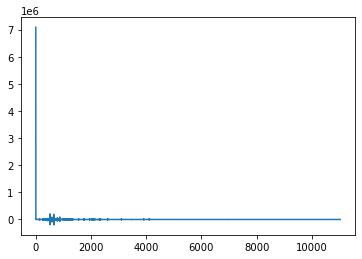

In [115]:
plt.plot(freq,y_sig)

In [116]:
condition=(freq>0)&(freq<2000)

y_sig[condition]=y_sig[condition]*1

C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


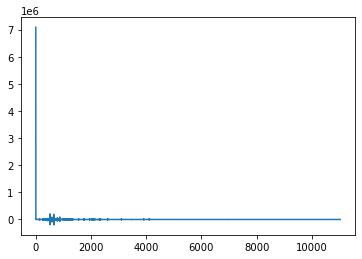

In [117]:
plt.plot(freq,y_sig)

In [118]:
y2=irfft(y_sig)

In [119]:
# t2=np.array(range(0,len(y2)))/sampling_rate

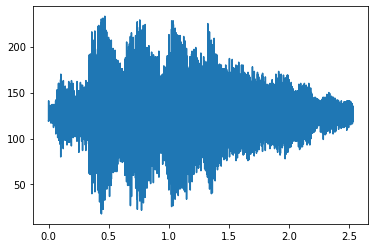

In [120]:
plt.plot(t,y2)

In [121]:
write("youssef.wav",sampling_rate, y2.astype(np.int16))
ipd.Audio("youssef.wav")